In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from scipy.stats import norm

# Simulating a banking dataset
np.random.seed(42)

# Simulate data
n_samples = 1000
age = np.random.randint(18, 70, n_samples)
income = np.random.normal(loc=50000, scale=15000, size=n_samples)  # Normal distribution for income
credit_score = np.random.randint(300, 850, n_samples)  # Credit score between 300 and 850
loan_amount = np.random.normal(loc=20000, scale=5000, size=n_samples)  # Normal distribution for loan amount

# Simulate the target variable 'Creditworthy' based on a simple rule:
# High credit score and income with lower loan amount means higher creditworthiness
creditworthy = ((credit_score > 650) & (income > 40000) & (loan_amount < 30000)).astype(int)

# Create a DataFrame
df = pd.DataFrame({
    'Age': age,
    'Income': income,
    'Credit_Score': credit_score,
    'Loan_Amount': loan_amount,
    'Creditworthy': creditworthy
})
df

,Age,Income,Credit_Score,Loan_Amount,Creditworthy
0,56,25903.305196,400,17135.639552,0
1,69,53051.954538,431,11666.948544,0
2,46,38654.738821,680,23451.184002,0
3,32,28666.194356,431,7208.158084,0
4,60,40301.406736,319,16342.432981,0
...,...,...,...,...,...
995,60,56292.986659,303,16210.719020,0
996,64,36687.617333,589,20124.287519,0
997,62,43438.125495,732,18497.725656,1
998,35,60835.720367,770,23042.038769,1


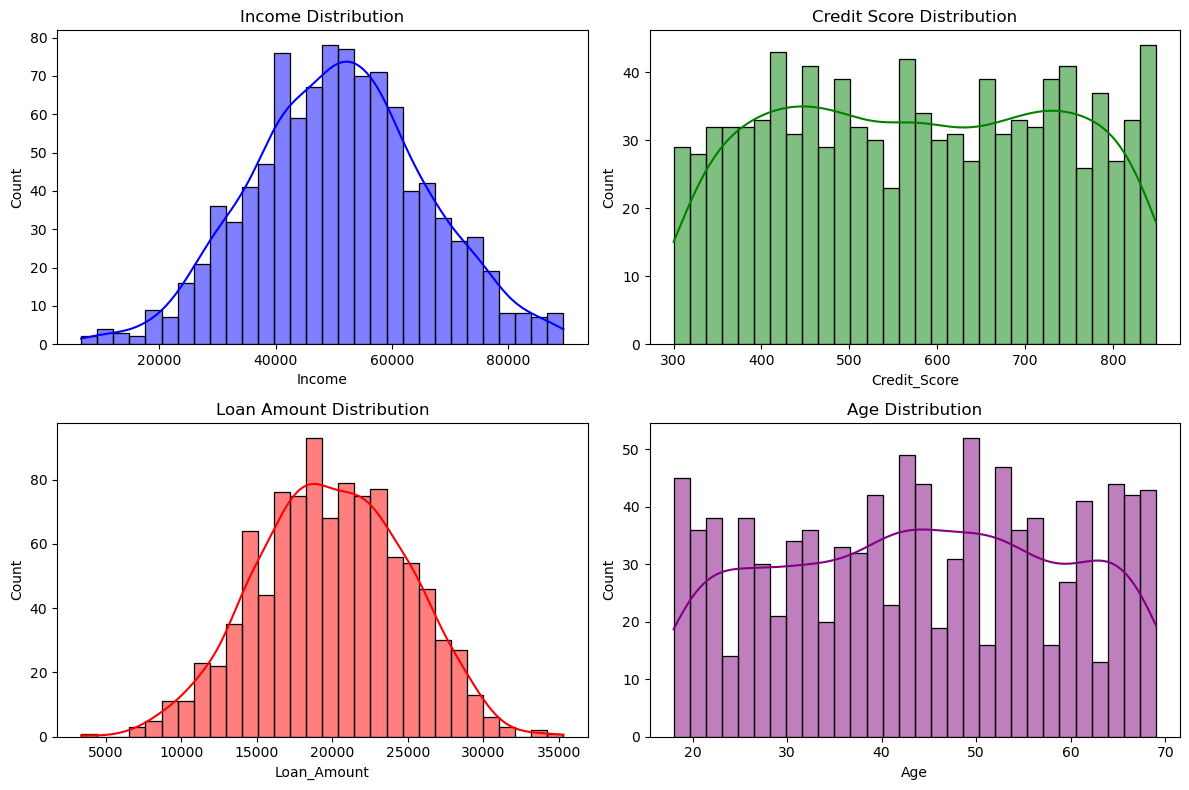

In [2]:
# 1. Data Exploration and Visualization

# Visualize the distributions of key features
plt.figure(figsize=(12, 8))

# Income Distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Income'], kde=True, color='blue', bins=30)
plt.title('Income Distribution')

# Credit Score Distribution
plt.subplot(2, 2, 2)
sns.histplot(df['Credit_Score'], kde=True, color='green', bins=30)
plt.title('Credit Score Distribution')

# Loan Amount Distribution
plt.subplot(2, 2, 3)
sns.histplot(df['Loan_Amount'], kde=True, color='red', bins=30)
plt.title('Loan Amount Distribution')

# Age Distribution
plt.subplot(2, 2, 4)
sns.histplot(df['Age'], kde=True, color='purple', bins=30)
plt.title('Age Distribution')

plt.tight_layout()
plt.show()

In [3]:
# 2. Data Preprocessing

# Split dataset into features and target variable
X = df[['Age', 'Income', 'Credit_Score', 'Loan_Amount']]
y = df['Creditworthy']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# 3. Logistic Regression Model

# Instantiate and fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [5]:
# 4. Predictions and Evaluation

# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"ROC AUC Score: {roc_auc:.2f}")

Accuracy: 0.90
Confusion Matrix:
[[135   7]
 [ 13  45]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       142
           1       0.87      0.78      0.82        58

    accuracy                           0.90       200
   macro avg       0.89      0.86      0.87       200
weighted avg       0.90      0.90      0.90       200

ROC AUC Score: 0.97


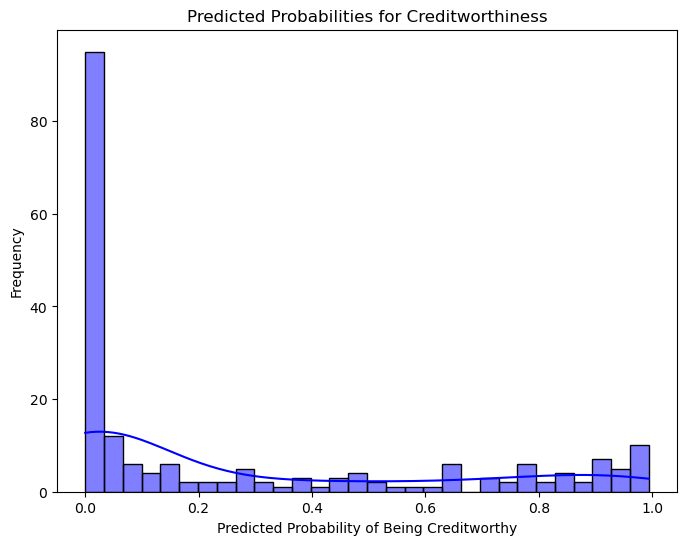

In [6]:
# 5. Visualizing the Probability Distribution of Predictions

# Plot the predicted probabilities
plt.figure(figsize=(8, 6))
sns.histplot(y_prob, kde=True, color='blue', bins=30)
plt.title('Predicted Probabilities for Creditworthiness')
plt.xlabel('Predicted Probability of Being Creditworthy')
plt.ylabel('Frequency')
plt.show()

In [8]:
# 6. Conclusion and Insights

# Print insights
print(f"\nsuccessfully built a logistic regression model to predict creditworthiness.")
print(f"The ROC AUC score of the model is {roc_auc:.2f}, indicating a good ability to discriminate between creditworthy and non-creditworthy customers.")


successfully built a logistic regression model to predict creditworthiness.
The ROC AUC score of the model is 0.97, indicating a good ability to discriminate between creditworthy and non-creditworthy customers.
